In [8]:
# Gerekli kütüphaneleri içe aktar – Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [10]:
# Veri setini oku – Read the dataset
df = pd.read_csv("student-mat.csv", sep=';')

# İlk 5 satırı göster – Show first 5 rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
# Veri hakkında genel bilgi – General dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [38]:
# Sınıf dağılımını incele – Check class balance
print(df['pass'].value_counts(normalize=True))


pass
1    0.670886
0    0.329114
Name: proportion, dtype: float64


In [14]:
# İstatistiksel özet – Statistical summary
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

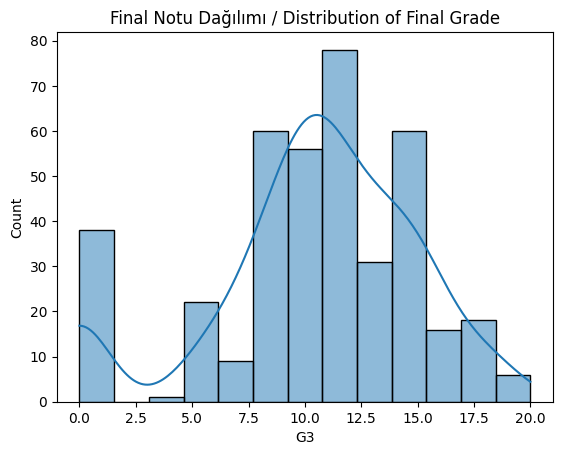

In [16]:
# Final notu dağılım grafiği – Final grade distribution plot
sns.histplot(df['G3'], kde=True)
plt.title("Final Notu Dağılımı / Distribution of Final Grade")
plt.show()

In [18]:
# G3'e göre geçme durumu belirle – Define pass/fail based on final grade (G3)
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# G3 sütununu kaldır – Drop original G3 column
df.drop(columns=['G3'], inplace=True)


In [20]:
# Label Encoder kullanarak string verileri sayıya çevir – Encode categorical (string) variables to numeric
label_encoders = {}

for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [57]:
# Özellikleri (X) ve hedef değişkeni (y) ayır – Separate features (X) and target variable (y)
X = df.drop('pass', axis=1)
y = df['pass']

In [59]:
# Veriyi eğitim ve test olarak ayır – Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Random Forest modelini tanımla ve eğit – Define and train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap – Make predictions
y_pred = model.predict(X_test)

In [63]:
# Doğruluk skorunu yazdır – Print accuracy score
print("Accuracy / Doğruluk:", accuracy_score(y_test, y_pred))


Accuracy / Doğruluk: 0.9113924050632911


In [65]:
# Sınıflandırma raporu – Classification report
print("Classification Report / Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Classification Report / Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



In [67]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, y_pred, target_names=["Fail / Başarısız", "Pass / Başarılı"]))


                  precision    recall  f1-score   support

Fail / Başarısız       0.83      0.93      0.88        27
 Pass / Başarılı       0.96      0.90      0.93        52

        accuracy                           0.91        79
       macro avg       0.90      0.91      0.90        79
    weighted avg       0.92      0.91      0.91        79



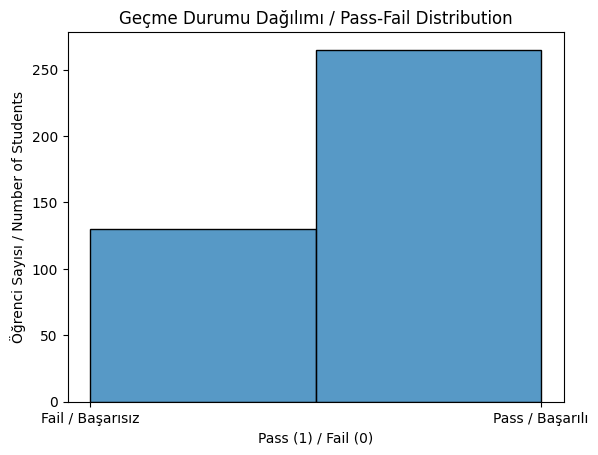

In [71]:
# Final notlarının dağılımı – Distribution of final grades
sns.histplot(df['pass'], kde=False, bins=2)
plt.xticks([0,1], ['Fail / Başarısız', 'Pass / Başarılı'])
plt.title("Geçme Durumu Dağılımı / Pass-Fail Distribution")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Öğrenci Sayısı / Number of Students")
plt.show()


C:\Users\aziz-\AppData\Local\Temp\ipykernel_2636\1585223958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pass_counts.index, y=pass_counts.values, palette="pastel")


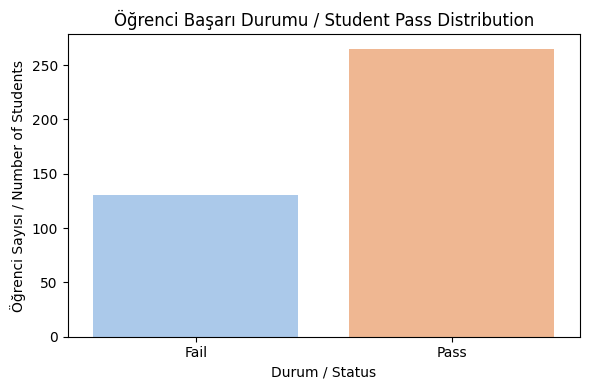

In [73]:
# Başarı durumu dağılımı – Distribution of pass/fail status
pass_counts = df['pass'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=pass_counts.index, y=pass_counts.values, palette="pastel")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.title("Öğrenci Başarı Durumu / Student Pass Distribution")
plt.ylabel("Öğrenci Sayısı / Number of Students")
plt.xlabel("Durum / Status")
plt.tight_layout()
plt.show()


C:\Users\aziz-\AppData\Local\Temp\ipykernel_2636\1432513923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="crest")


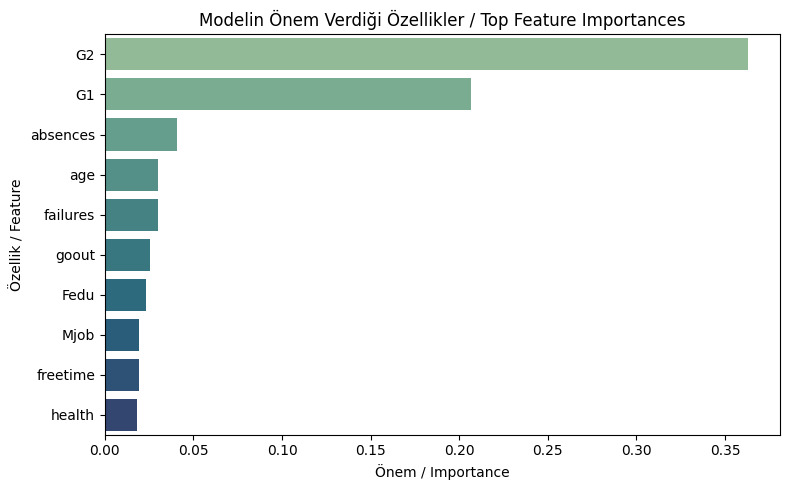

In [75]:
# Modelin en çok dikkate aldığı özellikler – Most important features used by the model
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="crest")
plt.title("Modelin Önem Verdiği Özellikler / Top Feature Importances")
plt.xlabel("Önem / Importance")
plt.ylabel("Özellik / Feature")
plt.tight_layout()
plt.show()


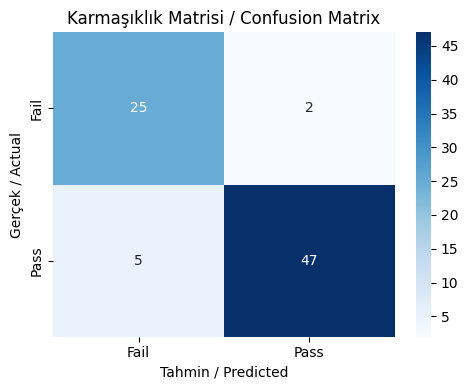

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ["Fail", "Pass"]

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Karmaşıklık Matrisi / Confusion Matrix")
plt.xlabel("Tahmin / Predicted")
plt.ylabel("Gerçek / Actual")
plt.tight_layout()
plt.show()
